# 스켈레톤 코드 2 - 49조
김다정, 김지혜, 오희수, 한영태

## 코드 수정 부분 (전처리)
1. 정가, 할인가 데이터 타입 변경 부분 -> 정가 예외처리된 부분 처리 코드 추가
2. 피부정보 컬럼 분리 -> 피부타입, 피부톤, 피부고민1, 피부고민2에 들어갈 값을 각각 먼저 추출 후 데이터프레임에 추가
3. 상품명 간소화 -> if문으로 처리하지 않고 for문과 리스트를 이용해 처리

## 코드 수정 부분 (모델링)
1. xgboost 모델링 및 혼동행렬 시각화 추가

### 데이터 불러오기

파일의 이름에 숫자만 다른 것을 이용하여 반복문으로 한번에 데이터를 가져와 df에 할당합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

#데이터 파일 불러오기
df= pd.read_excel("Top Rank 10.xlsx")
df

,브랜드,상품명,카테고리,정가,할인가,아이디,별점,피부정보,피부타입,피부고민,자극도
0,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,"43,000","28,900",고먐미먼지,5점만점에 3점,복합성 겨울쿨톤 미백 블랙헤드,지성에 좋아요,주름/미백에 좋아요,자극없이 순해요
1,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,"43,000","28,900",뚜딘,5점만점에 5점,복합성 웜톤 다크서클 모공,복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요
2,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,"43,000","28,900",수부지지만행복해묘,5점만점에 5점,지성 겨울쿨톤 모공 미백,건성에 좋아요,주름/미백에 좋아요,자극없이 순해요
3,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,"43,000","28,900",뽀드득뽀드득,5점만점에 5점,민감성 여름쿨톤 민감성 잡티,복합성에 좋아요,주름/미백에 좋아요,보통이에요
4,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,"43,000","28,900",요니양,5점만점에 5점,복합성 여름쿨톤 각질 모공,복합성에 좋아요,진정에 좋아요,보통이에요
...,...,...,...,...,...,...,...,...,...,...,...
9285,파티온,"[단독구성] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml...",에센스/크림,"32,000","19,900",2s****,5점만점에 5점,없음,지성에 좋아요,진정에 좋아요,자극없이 순해요
9286,파티온,"[단독구성] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml...",에센스/크림,"32,000","19,900",조성실,5점만점에 5점,없음,지성에 좋아요,진정에 좋아요,자극없이 순해요
9287,파티온,"[단독구성] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml...",에센스/크림,"32,000","19,900",깻잎이좋아,5점만점에 4점,트러블성 쿨톤 모공 미백,지성에 좋아요,진정에 좋아요,자극없이 순해요
9288,파티온,"[단독구성] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml...",에센스/크림,"32,000","19,900",sundead1,5점만점에 5점,없음,복합성에 좋아요,진정에 좋아요,자극없이 순해요


### 결측값 제거

크롤링 코드 작성 시 크롤링하지 못한 정보는 '없음'으로 저장하게 했기 때문에 '없음'의 갯수로 결측값의 갯수를 파악합니다.

In [2]:
###############제공된 코드 건드리지 마세요 ###################

### 데이터 컬럼별 없음(결측치) 개수 파악

col_name= df.columns    #컬럼명 저장
from collections import Counter

for i in col_name:
    print(i,Counter(df[i])["없음"])

브랜드 0
상품명 0
카테고리 0
정가 0
할인가 0
아이디 0
별점 0
피부정보 4408
피부타입 2
피부고민 2
자극도 2


In [3]:
#피부정보, 별점, 피부타입, 피부고민, 자극도 중 하나라도 값이 '없음'인 경우 제거
df = df[(df['피부정보'] != '없음') & (df['별점'] != '없음') & (df['피부타입'] != '없음') & (df['피부고민'] != '없음') & (df['자극도'] != '없음')]
df.head()

,브랜드,상품명,카테고리,정가,할인가,아이디,별점,피부정보,피부타입,피부고민,자극도
0,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,"43,000","28,900",고먐미먼지,5점만점에 3점,복합성 겨울쿨톤 미백 블랙헤드,지성에 좋아요,주름/미백에 좋아요,자극없이 순해요
1,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,"43,000","28,900",뚜딘,5점만점에 5점,복합성 웜톤 다크서클 모공,복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요
2,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,"43,000","28,900",수부지지만행복해묘,5점만점에 5점,지성 겨울쿨톤 모공 미백,건성에 좋아요,주름/미백에 좋아요,자극없이 순해요
3,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,"43,000","28,900",뽀드득뽀드득,5점만점에 5점,민감성 여름쿨톤 민감성 잡티,복합성에 좋아요,주름/미백에 좋아요,보통이에요
4,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,"43,000","28,900",요니양,5점만점에 5점,복합성 여름쿨톤 각질 모공,복합성에 좋아요,진정에 좋아요,보통이에요


In [4]:
### 별점, 피부타입, 피부고민, 자극도 값이 없음은 제거한 데이터를 df2에 저장
df2= df.copy()
df2.reset_index(drop=True, inplace=True)
df2.shape

(4880, 11)

In [5]:
###############제공된 코드 건드리지 마세요 ###################
### 데이터 컬럼별 없음(결측치) 개수 파악

col_name= df2.columns    #컬럼명 저장
from collections import Counter

for i in col_name:
    print(i,Counter(df2[i])["없음"])

브랜드 0
상품명 0
카테고리 0
정가 0
할인가 0
아이디 0
별점 0
피부정보 0
피부타입 0
피부고민 0
자극도 0


### 예외처리된 정가 할인가로 교체 + 정가, 할인가 데이터 타입 변경
제품 할인이 없는 경우 정가는 예외처리되고 할인가에 정가가 저장됨 -> 정가에 할인가 채워넣기

정가,할인가의 쉼표를 제거하고 데이터 타입을 int64로 바꿔줍니다.

In [6]:
#기존 데이터 타입 확인
df2.dtypes

브랜드     object
상품명     object
카테고리    object
정가      object
할인가     object
아이디     object
별점      object
피부정보    object
피부타입    object
피부고민    object
자극도     object
dtype: object

In [7]:
# 예외처리된 정가열의 값을 할인가로 교체
df2.loc[df2[df2['정가'] == 0].index, '정가'] = df2.loc[df2[df2['정가'] == 0].index, '할인가']

#정가, 할인가 열에서 ','제거하고 int 타입으로 변환
df2['정가'] = df2['정가'].str.replace(',', '').astype('int64')
df2['할인가'] = df2['할인가'].str.replace(',', '').astype('int64')

df2

,브랜드,상품명,카테고리,정가,할인가,아이디,별점,피부정보,피부타입,피부고민,자극도
0,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,고먐미먼지,5점만점에 3점,복합성 겨울쿨톤 미백 블랙헤드,지성에 좋아요,주름/미백에 좋아요,자극없이 순해요
1,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,뚜딘,5점만점에 5점,복합성 웜톤 다크서클 모공,복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요
2,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,수부지지만행복해묘,5점만점에 5점,지성 겨울쿨톤 모공 미백,건성에 좋아요,주름/미백에 좋아요,자극없이 순해요
3,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,뽀드득뽀드득,5점만점에 5점,민감성 여름쿨톤 민감성 잡티,복합성에 좋아요,주름/미백에 좋아요,보통이에요
4,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,요니양,5점만점에 5점,복합성 여름쿨톤 각질 모공,복합성에 좋아요,진정에 좋아요,보통이에요
...,...,...,...,...,...,...,...,...,...,...,...
4875,파티온,"[단독구성] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml...",에센스/크림,32000,19900,leg****,5점만점에 5점,복합성 쿨톤 각질 블랙헤드,지성에 좋아요,진정에 좋아요,자극없이 순해요
4876,파티온,"[단독구성] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml...",에센스/크림,32000,19900,minji****,5점만점에 5점,지성 웜톤 다크서클 모공,지성에 좋아요,진정에 좋아요,자극없이 순해요
4877,파티온,"[단독구성] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml...",에센스/크림,32000,19900,트리브링,5점만점에 5점,복합성 웜톤 각질 다크서클,복합성에 좋아요,진정에 좋아요,자극없이 순해요
4878,파티온,"[단독구성] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml...",에센스/크림,32000,19900,봄웜라소리질러,5점만점에 4점,트러블성 봄웜톤 민감성 트러블,복합성에 좋아요,진정에 좋아요,자극없이 순해요


In [8]:
df2.dtypes

브랜드     object
상품명     object
카테고리    object
정가       int64
할인가      int64
아이디     object
별점      object
피부정보    object
피부타입    object
피부고민    object
자극도     object
dtype: object

### 아이디 컬럼 삭제

모델 학습 시 아이디 정보는 필요하지 않기 때문에 제거해줍니다.

In [9]:
df2 = df2.drop(columns=['아이디'])
df2.head()

,브랜드,상품명,카테고리,정가,할인가,별점,피부정보,피부타입,피부고민,자극도
0,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5점만점에 3점,복합성 겨울쿨톤 미백 블랙헤드,지성에 좋아요,주름/미백에 좋아요,자극없이 순해요
1,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5점만점에 5점,복합성 웜톤 다크서클 모공,복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요
2,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5점만점에 5점,지성 겨울쿨톤 모공 미백,건성에 좋아요,주름/미백에 좋아요,자극없이 순해요
3,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5점만점에 5점,민감성 여름쿨톤 민감성 잡티,복합성에 좋아요,주름/미백에 좋아요,보통이에요
4,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5점만점에 5점,복합성 여름쿨톤 각질 모공,복합성에 좋아요,진정에 좋아요,보통이에요


### 별점에서 숫자만 남기기

현재 별점은 5점만점에 X점과 같은 형식으로 되어있습니다. 여기서 X만 남기고 데이터 타입을 int64로 바꿔줍니다.

In [10]:
df2['별점'] = df2['별점'].str.extract(r'(\d+)점$').astype('int64')

df2.head()

,브랜드,상품명,카테고리,정가,할인가,별점,피부정보,피부타입,피부고민,자극도
0,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,3,복합성 겨울쿨톤 미백 블랙헤드,지성에 좋아요,주름/미백에 좋아요,자극없이 순해요
1,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5,복합성 웜톤 다크서클 모공,복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요
2,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5,지성 겨울쿨톤 모공 미백,건성에 좋아요,주름/미백에 좋아요,자극없이 순해요
3,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5,민감성 여름쿨톤 민감성 잡티,복합성에 좋아요,주름/미백에 좋아요,보통이에요
4,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5,복합성 여름쿨톤 각질 모공,복합성에 좋아요,진정에 좋아요,보통이에요


In [11]:
#별점 제대로 처리되었는지 확인
df2['별점'].value_counts()

5    4075
4     574
3     159
2      39
1      33
Name: 별점, dtype: int64

In [12]:
#별점 제대로 처리되었는지 확인하기 위해 원본 데이터 확인 -> 개수 일치 & 제대로 처리됨 확인
df['별점'].value_counts()

5점만점에 5점    4075
5점만점에 4점     574
5점만점에 3점     159
5점만점에 2점      39
5점만점에 1점      33
Name: 별점, dtype: int64

In [13]:
df2.dtypes

브랜드     object
상품명     object
카테고리    object
정가       int64
할인가      int64
별점       int64
피부정보    object
피부타입    object
피부고민    object
자극도     object
dtype: object

### 피부정보 컬럼을 여러컬럼으로 구분

피부정보에는 최대 피부타입, 피부톤, 2개의 피부고민 총 4개로 이루어져 있습니다.  
해당 텍스트는 공백으로 구분되어있고 이를 이용해 4개의 컬럼(user피부타입/user피부톤/user피부고민1/user피부고민2)으로 만들어 줍니다.

In [14]:
# '피부타입' 추출: '성'이 들어가는 원소 중에서 첫 번째 원소 추출후 info에서 삭제
info=df2['피부정보'].str.split(' ')

types = []
for i in info:
    extracted_type = next((item for item in i if '성' in item), None)
    if extracted_type is not None:
        i.remove(extracted_type)
    types.append(extracted_type)

type = pd.Series(types, name='user피부타입')
type = type.apply(lambda x: x if x is None else ', '.join([x]))

print(type)

0        복합성
1        복합성
2         지성
3        민감성
4        복합성
        ... 
4875     복합성
4876      지성
4877     복합성
4878    트러블성
4879    트러블성
Name: user피부타입, Length: 4880, dtype: object


In [15]:
#'피부톤' 추출: '톤'이 들어가는 원소 추출 후 info에서 삭제
tones_present = []
for i in info:
    if any('톤' in item for item in i):
        extracted_tones = [item for item in i if '톤' in item]
        i[:] = [item for item in i if item not in extracted_tones]
        tones_present.append(extracted_tones)
    else:
        tones_present.append(None)

tone = pd.Series(tones_present, name='user피부톤')
tone = tone.apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

tone

0       겨울쿨톤
1         웜톤
2       겨울쿨톤
3       여름쿨톤
4       여름쿨톤
        ... 
4875      쿨톤
4876      웜톤
4877      웜톤
4878     봄웜톤
4879      쿨톤
Name: user피부톤, Length: 4880, dtype: object

In [16]:
#'피부고민1' 추출: 남은 원소 중 첫번째 원소 추출 후 info에서 삭제
first_elements = []
for i in info:
    if len(i) > 0:
        first_element = i.pop(0)
    else:
        first_element = None
    first_elements.append(first_element)

first = pd.Series(first_elements, name='첫번째원소')

first

0         미백
1       다크서클
2         모공
3        민감성
4         각질
        ... 
4875      각질
4876    다크서클
4877      각질
4878     민감성
4879      모공
Name: 첫번째원소, Length: 4880, dtype: object

In [18]:
#'피부고민2' 추출: 남은 원소 추출 & 빈 리스트는 결측치로 처리
second=info.copy()
second = second.apply(lambda i: ', '.join(i) if i else None)

second

0       블랙헤드
1         모공
2         미백
3         잡티
4         모공
        ... 
4875    블랙헤드
4876      모공
4877    다크서클
4878     트러블
4879      미백
Name: 피부정보, Length: 4880, dtype: object

In [19]:
#추출한 정보 데이터프레임에 추가

df2["user피부타입"] = type
df2["user피부톤"] = tone
df2["user피부고민1"] = first
df2["user피부고민2"] = second

df2

,브랜드,상품명,카테고리,정가,할인가,별점,피부정보,피부타입,피부고민,자극도,user피부타입,user피부톤,user피부고민1,user피부고민2
0,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,3,복합성 겨울쿨톤 미백 블랙헤드,지성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,겨울쿨톤,미백,블랙헤드
1,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5,복합성 웜톤 다크서클 모공,복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,웜톤,다크서클,모공
2,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5,지성 겨울쿨톤 모공 미백,건성에 좋아요,주름/미백에 좋아요,자극없이 순해요,지성,겨울쿨톤,모공,미백
3,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5,민감성 여름쿨톤 민감성 잡티,복합성에 좋아요,주름/미백에 좋아요,보통이에요,민감성,여름쿨톤,민감성,잡티
4,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5,복합성 여름쿨톤 각질 모공,복합성에 좋아요,진정에 좋아요,보통이에요,복합성,여름쿨톤,각질,모공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,파티온,"[단독구성] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml...",에센스/크림,32000,19900,5,복합성 쿨톤 각질 블랙헤드,지성에 좋아요,진정에 좋아요,자극없이 순해요,복합성,쿨톤,각질,블랙헤드
4876,파티온,"[단독구성] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml...",에센스/크림,32000,19900,5,지성 웜톤 다크서클 모공,지성에 좋아요,진정에 좋아요,자극없이 순해요,지성,웜톤,다크서클,모공
4877,파티온,"[단독구성] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml...",에센스/크림,32000,19900,5,복합성 웜톤 각질 다크서클,복합성에 좋아요,진정에 좋아요,자극없이 순해요,복합성,웜톤,각질,다크서클
4878,파티온,"[단독구성] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml...",에센스/크림,32000,19900,4,트러블성 봄웜톤 민감성 트러블,복합성에 좋아요,진정에 좋아요,자극없이 순해요,트러블성,봄웜톤,민감성,트러블


In [20]:
#열별 결측치 확인
df2.isna().sum()

브랜드            0
상품명            0
카테고리           0
정가             0
할인가            0
별점             0
피부정보           0
피부타입           0
피부고민           0
자극도            0
user피부타입      46
user피부톤      318
user피부고민1    212
user피부고민2    646
dtype: int64

In [21]:
#피부타입에 피부타입 이외의 값이 들어갔는지 확인
df2['user피부타입'].value_counts()

복합성     2165
건성      1040
지성       746
민감성      495
트러블성     257
약건성       68
중성        63
Name: user피부타입, dtype: int64

In [22]:
#피부톤에 피부톤 이외의 값이 들어갔는지 확인
df2['user피부톤'].value_counts()

웜톤      1475
쿨톤      1210
여름쿨톤     590
봄웜톤      587
가을웜톤     427
겨울쿨톤     273
Name: user피부톤, dtype: int64

### user피부타입, usesr피부고민1, user피부고민2 에서 결측값 제거

In [23]:
df2.isnull().sum()

브랜드            0
상품명            0
카테고리           0
정가             0
할인가            0
별점             0
피부정보           0
피부타입           0
피부고민           0
자극도            0
user피부타입      46
user피부톤      318
user피부고민1    212
user피부고민2    646
dtype: int64

In [24]:
#피부톤은 이후 과정에서 삭제하기 때문에 데이터 손실을 방지하고자 결측치가 있는 데이터를 삭제하지 않았습니다.
df2.dropna(subset=['user피부타입', 'user피부고민1', 'user피부고민2'], inplace=True)
df2.isnull().sum()

브랜드            0
상품명            0
카테고리           0
정가             0
할인가            0
별점             0
피부정보           0
피부타입           0
피부고민           0
자극도            0
user피부타입       0
user피부톤      220
user피부고민1      0
user피부고민2      0
dtype: int64

In [25]:
df2.head()

,브랜드,상품명,카테고리,정가,할인가,별점,피부정보,피부타입,피부고민,자극도,user피부타입,user피부톤,user피부고민1,user피부고민2
0,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,3,복합성 겨울쿨톤 미백 블랙헤드,지성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,겨울쿨톤,미백,블랙헤드
1,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5,복합성 웜톤 다크서클 모공,복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,웜톤,다크서클,모공
2,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5,지성 겨울쿨톤 모공 미백,건성에 좋아요,주름/미백에 좋아요,자극없이 순해요,지성,겨울쿨톤,모공,미백
3,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5,민감성 여름쿨톤 민감성 잡티,복합성에 좋아요,주름/미백에 좋아요,보통이에요,민감성,여름쿨톤,민감성,잡티
4,구달,[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획,에센스/크림,43000,28900,5,복합성 여름쿨톤 각질 모공,복합성에 좋아요,진정에 좋아요,보통이에요,복합성,여름쿨톤,각질,모공


In [26]:
df2.shape

(4221, 14)

### df2를 df3에 복사한 후 상품명컬럼의 값을 간단하게 변경해줍니다.
* 대용량 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+31ml 증정 기획                                     : goodal
* [1등 국민미스트] 달바 화이트 트러플 퍼스트 스프레이 세럼 100ml + 100ml 기획세트                        : dalba_mist
* 성분에디터 그린토마토 포어 리프팅 앰플 플러스 30ml+10ml 기획                                           : sungboon
* [2세대 천만크림] 닥터지 레드 블레미쉬 클리어 수딩 크림 70ml+30ml 세트                                  : dr_g
* 라로슈포제 NEW 시카플라스트 밤B5+ 100ml 기획(+시카토너 50ml 증정)                                      : larocheposay
* [100ml+100ml/단독기획] 토리든 다이브인 저분자 히알루론산 수딩크림 더블기획                             : torriden_cream
* 에스트라 아토베리어365 크림 80ml 기획 (+하이드로에센스 25ml+무기자차선크림10ml 증정)(2305)             : aestura_cream
* 에스트라 아토베리어365 로션 150ml 기획 (+하이드로에센스 25ml+무기자차선크림10ml 증정)                  : aestura_lotion
* [단독기획] 토리든 다이브인 저분자 히알루론산 세럼 더블기획 (50ml+50ml)                                 : torriden_serum
* [5월 올영픽/대용량] 파티온 노스카나인 트러블 세럼 단독 기획(50ml+15ml)                                 : fation
* [쿵야 키링&스티커 증정] V&A 안티옥시던트 래디언스 앰플 더블 기획 (30ml+30ml)                           : V&A
* [박은빈 PICK] 한율 어린쑥 수분진정크림 55ml 기획(+45ml 리필 증정)                                      : hanyul

In [27]:
#상품명의 값들을 리스트 a로 할당
df3=df2.copy()
a = df3['상품명'].unique().tolist()
a

['[홍현희 PICK/ 한정기획] 구달 청귤 비타C 잡티케어 세럼 50ml+50ml 리필기획',
 '[소의튜브PICK]듀이트리 AC 컨트롤 딥 그린 카밍 에센스 기획(40ml+크림 20ml)',
 '[8월 올영픽/1+1단독] 성분에디터 그린토마토 포어 리프팅 앰플 플러스 30ml 더블 기획',
 '[뽐니PICK/한정기획] 토리든 다이브인 세럼 50ml 리필 한정 기획(+50ml 리필팩+수딩 크림 20ml)',
 '[8월 올영픽]구달 청귤 비타C 잡티케어 크림 리필에디션 기획(75ml+75ml리필)',
 '[8월 올영픽/소의튜브 PICK] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 기획 (60ml+30ml)',
 '[8월 올영픽/리필기획] 아누아 어성초 77 수딩 토너 350ml 리필 기획세트(350ml+350ml리필)',
 '[8월올영픽/단독기획] 토리든 다이브인 저분자 히알루론산 수딩크림 더블기획 (100ml+100ml)',
 '라로슈포제 NEW 시카플라스트 밤B5+ 100ml 기획(+시카토너 50ml 증정)',
 '[단독구성] 파티온 노스카나인 트러블 크림 45ml 기획(+크림5ml, 세럼15ml 증정)']

In [28]:
#간소화하여 대체될 상품명을 리스트 b로 할당
b=['goodal_serum', 'dewytree', 'sungboon', 'torriden_serum', 'goodal_cream', 'snature', 'anua', 'torriden_cream', 'larocheposay', 'fation']

In [29]:
#리스트와 반복문을 이용한 상품명 간소화
for i in range(len(a)):
    df3['상품명'] = df3['상품명'].replace(a[i], b[i])

In [30]:
df3

,브랜드,상품명,카테고리,정가,할인가,별점,피부정보,피부타입,피부고민,자극도,user피부타입,user피부톤,user피부고민1,user피부고민2
0,구달,goodal_serum,에센스/크림,43000,28900,3,복합성 겨울쿨톤 미백 블랙헤드,지성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,겨울쿨톤,미백,블랙헤드
1,구달,goodal_serum,에센스/크림,43000,28900,5,복합성 웜톤 다크서클 모공,복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,웜톤,다크서클,모공
2,구달,goodal_serum,에센스/크림,43000,28900,5,지성 겨울쿨톤 모공 미백,건성에 좋아요,주름/미백에 좋아요,자극없이 순해요,지성,겨울쿨톤,모공,미백
3,구달,goodal_serum,에센스/크림,43000,28900,5,민감성 여름쿨톤 민감성 잡티,복합성에 좋아요,주름/미백에 좋아요,보통이에요,민감성,여름쿨톤,민감성,잡티
4,구달,goodal_serum,에센스/크림,43000,28900,5,복합성 여름쿨톤 각질 모공,복합성에 좋아요,진정에 좋아요,보통이에요,복합성,여름쿨톤,각질,모공
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,파티온,fation,에센스/크림,32000,19900,5,복합성 쿨톤 각질 블랙헤드,지성에 좋아요,진정에 좋아요,자극없이 순해요,복합성,쿨톤,각질,블랙헤드
4876,파티온,fation,에센스/크림,32000,19900,5,지성 웜톤 다크서클 모공,지성에 좋아요,진정에 좋아요,자극없이 순해요,지성,웜톤,다크서클,모공
4877,파티온,fation,에센스/크림,32000,19900,5,복합성 웜톤 각질 다크서클,복합성에 좋아요,진정에 좋아요,자극없이 순해요,복합성,웜톤,각질,다크서클
4878,파티온,fation,에센스/크림,32000,19900,4,트러블성 봄웜톤 민감성 트러블,복합성에 좋아요,진정에 좋아요,자극없이 순해요,트러블성,봄웜톤,민감성,트러블


In [31]:
#상품명이 제대로 교체되었는지 확인
df3['상품명'].unique()

array(['goodal_serum', 'dewytree', 'sungboon', 'torriden_serum',
       'goodal_cream', 'snature', 'anua', 'torriden_cream',
       'larocheposay', 'fation'], dtype=object)

### 브랜드, 피부정보, user피부톤 컬럼을 삭제합니다.

In [32]:
df3 = df3.drop(['브랜드', '피부정보', 'user피부톤'], axis=1)
df3.head()

,상품명,카테고리,정가,할인가,별점,피부타입,피부고민,자극도,user피부타입,user피부고민1,user피부고민2
0,goodal_serum,에센스/크림,43000,28900,3,지성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,미백,블랙헤드
1,goodal_serum,에센스/크림,43000,28900,5,복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,다크서클,모공
2,goodal_serum,에센스/크림,43000,28900,5,건성에 좋아요,주름/미백에 좋아요,자극없이 순해요,지성,모공,미백
3,goodal_serum,에센스/크림,43000,28900,5,복합성에 좋아요,주름/미백에 좋아요,보통이에요,민감성,민감성,잡티
4,goodal_serum,에센스/크림,43000,28900,5,복합성에 좋아요,진정에 좋아요,보통이에요,복합성,각질,모공


### 컬럼명을 변경해줍니다.
* 피부타입 -> 효과1  
* 피부고민 -> 효과2  
* user피부타입 -> 피부타입  
* user피부고민1 -> 피부고민1  
* user피부고민2 -> 피부고민2 

In [33]:
df3.rename(columns={'피부타입': '효과1',
                    '피부고민': '효과2',
                    'user피부타입': '피부타입',
                    'user피부고민1': '피부고민1',
                    'user피부고민2': '피부고민2'}, inplace=True)
df3.head()

,상품명,카테고리,정가,할인가,별점,효과1,효과2,자극도,피부타입,피부고민1,피부고민2
0,goodal_serum,에센스/크림,43000,28900,3,지성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,미백,블랙헤드
1,goodal_serum,에센스/크림,43000,28900,5,복합성에 좋아요,주름/미백에 좋아요,자극없이 순해요,복합성,다크서클,모공
2,goodal_serum,에센스/크림,43000,28900,5,건성에 좋아요,주름/미백에 좋아요,자극없이 순해요,지성,모공,미백
3,goodal_serum,에센스/크림,43000,28900,5,복합성에 좋아요,주름/미백에 좋아요,보통이에요,민감성,민감성,잡티
4,goodal_serum,에센스/크림,43000,28900,5,복합성에 좋아요,진정에 좋아요,보통이에요,복합성,각질,모공


In [34]:
df3.shape

(4221, 11)

## 데이터 인코딩

In [35]:
df3["자극도"].value_counts()

자극없이 순해요    3359
보통이에요        796
자극이 느껴져요      66
Name: 자극도, dtype: int64

### 직접 함수를 만들어 자극도 컬럼을 레이블인코딩 합니다.
* 자극없이 순해요 -> 0
* 보통이에요 -> 1
* 자극이 느껴져요 -> 2

In [36]:
def 자극도인코딩(x):
    if x == '자극없이 순해요':
        return 0
    elif x == '보통이에요':
        return 1
    elif x == '자극이 느껴져요':
        return 2
    else:
        return None

# '자극도' 컬럼 레이블 인코딩 적용
df3['자극도'] = df3['자극도'].apply(자극도인코딩)
df3["자극도"].value_counts()

0    3359
1     796
2      66
Name: 자극도, dtype: int64

### 상품명, 카테고리, 효과1, 효과2, 피부타입, 피부고민1, 피부고민2 은  get_dummies를 이용해 원핫인코딩을 합니다.
결과를 df4에 저장합니다.

In [37]:
df4=df3.copy()
df4 = pd.get_dummies(df4, columns=['상품명', '카테고리', '효과1', '효과2', '피부타입', '피부고민1', '피부고민2'])
df4

,정가,할인가,별점,자극도,상품명_anua,상품명_dewytree,상품명_fation,상품명_goodal_cream,상품명_goodal_serum,상품명_larocheposay,...,피부고민2_미백,피부고민2_민감성,피부고민2_블랙헤드,피부고민2_아토피,피부고민2_잡티,피부고민2_주름,피부고민2_탄력,피부고민2_트러블,피부고민2_피지과다,피부고민2_홍조
0,43000,28900,3,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,43000,28900,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,43000,28900,5,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,43000,28900,5,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,43000,28900,5,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,32000,19900,5,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4876,32000,19900,5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4877,32000,19900,5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4878,32000,19900,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 랜덤포레스트

#### 피처값과 타겟값을 지정해줍니다. (target : 별점, 피처는 별점 제외 모든 컬럼)

In [38]:
features = df4.drop('별점', axis=1)
target = df4['별점']

#### 저장한 피처와 타겟을 가지고 train : test 데이터를 8:2로 나누어 줍니다. random_state = 50

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=50)

#### df4의 별점의 분포를 막대그래프로 시각화하여 불균형한지 확인합니다.

In [40]:
df4['별점'].dtypes

dtype('int64')

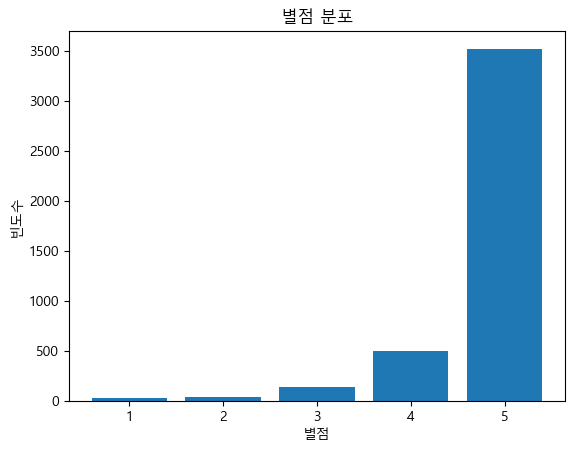

In [41]:
#한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

#막대그래프 코드 작성
rating_counts = df4['별점'].value_counts()
plt.bar(df4['별점'].value_counts().index, rating_counts.values)

plt.title("별점 분포")
plt.xlabel("별점")
plt.ylabel("빈도수")

plt.show()

### 불균형한 데이터 샘플링 SMOTE 활용

In [42]:
#불균형 데이터 오버샘플링 SMOTE 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("SMOTE 적용 전 train 데이터셋 shape : ", X_train.shape, y_train.shape)
print('SMOTE 적용 후 train 데이터셋 shape :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 train 타겟 별점 분포',y_train_over.value_counts() )

SMOTE 적용 전 train 데이터셋 shape :  (3376, 51) (3376,)
SMOTE 적용 후 train 데이터셋 shape : (14110, 51) (14110,)
SMOTE 적용 후 train 타겟 별점 분포 5    2822
4    2822
3    2822
2    2822
1    2822
Name: 별점, dtype: int64


### 데이터 스케일링
피처의 단위를 동일하게 만들기 위해 StandardScaler로 스케일링을 진행합니다.

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

### 그리드서치로 최적의 파라미터 찾기 
1. 지정할 파라미터와 값을 params에 저장합니다.  
2. 랜덤포레스트 모델을 생성하고 rfc로 할당합니다. (random_state=100, n_jobs=-1)  
3. 그리드서치를 실행하여 grid_cv로 할당합니다. (cv=3, n_jobs=-1)
4. 스케일링 완료한 훈련 데이터를 grid_cv에 fit해줍니다.
5. 최적의 파라미터를 print 합니다.

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#각 파라미터 값 넣기
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10]
}

rfc = RandomForestClassifier(random_state=100, n_jobs=-1)
grid_cv = GridSearchCV(estimator=rfc, param_grid=params, cv=3, n_jobs=-1) # cv는 교차 검증을 위해 분할되는 학습 데이터의 세트 수
grid_cv.fit(X_train_scaled, y_train_over)

print(f'최적 파라미터: {grid_cv.best_params_}')

최적 파라미터: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 200}


### 랜덤포레스트 모델 훈련
위에서 구한 최적 파라미터를 활용하여 랜덤포레스트 모델을 만들고 해당 모델로 다시 훈련시킵니다. random_state=100, n_jobs=-1

In [45]:
from sklearn.ensemble import RandomForestClassifier
best_params = grid_cv.best_params_
rfc = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_split=best_params['min_samples_split'],
    random_state=100,
    n_jobs=-1
)

rfc.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='auto', min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=100)

 ### 모델 평가지표 결과값이 한번에 나오도록 함수 만들기
 함수에 y_test와 pred를 입력하면 정확도, 정밀도, 재현율, f1스코어가 데이터 프레임으로 나오도록 함수를 만듭니다.  
 단, 정확도, 정밀도, 재현율, f1스코어의 average는 모두 'micro'로 설정  
 딕셔너리를 활용하여 데이터 프레임을 만들어주세요.  

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def _metrics(y_test, pred):
    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='micro')
    recall = recall_score(y_test, pred, average='micro')
    f1 = f1_score(y_test, pred, average='micro')
    
    dict_metrics = {
        'Accuracy': [acc],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    }
    df_metrics = pd.DataFrame(dict_metrics)
    
    return df_metrics

#### 스케일링한 test데이터를 가지고 모델에 적용하여 나온 예측값을 pred에 할당하고 평가지표함수로 성능을 확인합니다.

In [47]:
pred = rfc.predict(X_test_scaled)

_metrics(y_test, pred)

,Accuracy,Precision,Recall,F1 Score
0,0.804734,0.804734,0.804734,0.804734


### 피처 중요도 확인하기

피처 중요도 값을 저장한 feat_importance 값을 내림차순하여 20개만 top_20에 할당합니다.  
그 값을 가지고 barplot을 만들어 줍니다. 
* 제목 : 피처 중요도 Top2 20 
* figsize = (8,6)

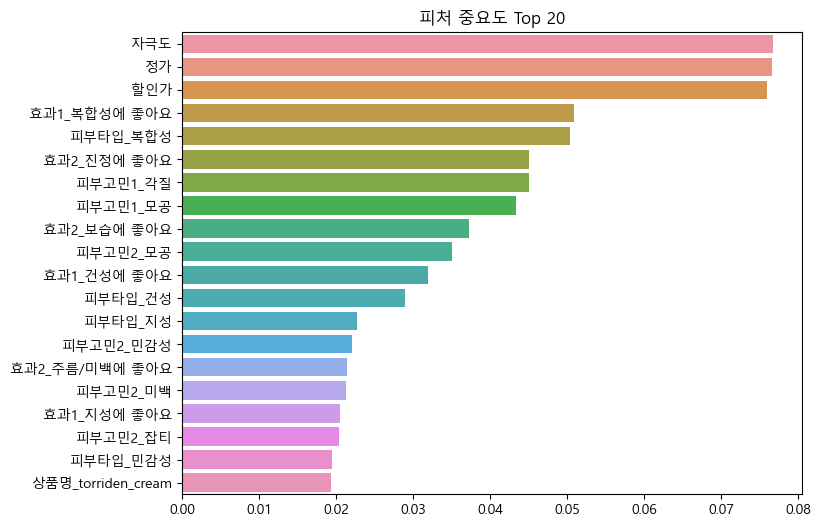

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 제공 코드
feat_importance = pd.Series(rfc.feature_importances_, index=features.columns)

top20 = feat_importance.sort_values(ascending=False).head(20)

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.title('피처 중요도 Top 20')
sns.barplot(x=top20.values, y=top20.index)
plt.show()

### 혼동행렬
y_test와 예측값 pred를 이용하여 혼동행렬 생성하여 cf에 할당합니다.

In [49]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, pred)
cf

array([[  1,   0,   0,   0,   5],
       [  0,   0,   0,   1,   6],
       [  1,   1,   2,   3,  28],
       [  0,   0,   0,  13,  85],
       [  0,   4,  10,  21, 664]], dtype=int64)

### 혼동행렬 시각화
cf를 데이터 프레임(cf_matrix)으로 만든 후 컬럼명과, 인덱스를 1~5점으로 저장합니다.   
데이터 프레임을 heatmap으로 만들어 줍니다. ( anno=True  -> 각 셀에 숫자 입력 , fmt='d'  -> 정수형으로 나오도록함)   
x라벨 : 예측값, y라벨 : 실제값

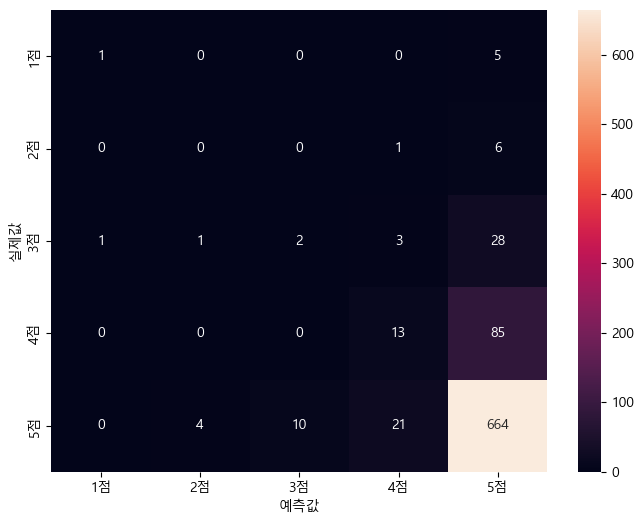

In [50]:
cf_matrix = pd.DataFrame(cf, index=['1점', '2점', '3점', '4점', '5점'], columns=['1점', '2점', '3점', '4점', '5점'])

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

# KNN

### 랜덤포레스트와 데이터 스케일링까지 과정이 반복됨

In [51]:
#데이터 다시 확인해보기
df4.head()

,정가,할인가,별점,자극도,상품명_anua,상품명_dewytree,상품명_fation,상품명_goodal_cream,상품명_goodal_serum,상품명_larocheposay,...,피부고민2_미백,피부고민2_민감성,피부고민2_블랙헤드,피부고민2_아토피,피부고민2_잡티,피부고민2_주름,피부고민2_탄력,피부고민2_트러블,피부고민2_피지과다,피부고민2_홍조
0,43000,28900,3,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,43000,28900,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,43000,28900,5,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,43000,28900,5,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,43000,28900,5,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### 피처값과 타겟값  (target : 별점, 피처는 별점 제외 모든 컬럼)

In [52]:
features = df4.drop('별점', axis=1)
target = df4['별점']

#### 저장한 피처와 타겟을 가지고 train : test 데이터를 8:2로 나누어 줍니다. random_state = 50

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#train/test 데이터 분리 8:2로
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=50)

#### 불균형 데이터 smote로 오버샘플링

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

#### 피처의 단위를 동일하게 만들기 위해 StandardScaler로 스케일링을 진행합니다.

In [55]:
from sklearn.preprocessing import StandardScaler
      
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

### 그리드서치로 최적의 파라미터 찾기 
1. 지정할 파라미터와 값을 knn_params에 저장합니다.  
2. KNN 모델을 생성하고 knn으로 할당합니다. (n_jobs=-1)  
3. 그리드서치를 실행하여 grid_cv로 할당합니다. (cv=5, n_jobs=-1)
4. 스케일링 완료한 훈련 데이터를 grid_cv에 fit해줍니다.
5. 최적의 파라미터를 print 합니다.

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 각 파라미터 값 넣기
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier(n_jobs=-1)

grid_cv = GridSearchCV(estimator=knn, param_grid=knn_params, cv=5, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train_over)

print(f'최적 하이퍼 파라미터: {grid_cv.best_params_}')

최적 하이퍼 파라미터: {'n_neighbors': 5, 'weights': 'distance'}


### KNN 모델 훈련
위에서 구한 최적 파라미터를 활용하여 knn 모델을 만들고 해당 모델로 다시 훈련시킵니다. n_jobs=-1

In [57]:
best_knn_params = grid_cv.best_params_
knn = KNeighborsClassifier(
    n_neighbors=best_knn_params['n_neighbors'],
    weights=best_knn_params['weights'],
    n_jobs=-1
)

knn.fit(X_train_over, y_train_over)

KNeighborsClassifier(n_jobs=-1, weights='distance')

#### 스케일링한 test데이터를 가지고 모델에 적용하여 나온 예측값을 knn_pred에 할당하고 평가지표함수로 성능을 확인합니다.

In [58]:
knn_pred = knn.predict(X_test_scaled)

_metrics(y_test,knn_pred)

,Accuracy,Precision,Recall,F1 Score
0,0.714793,0.714793,0.714793,0.714793


### 혼동행렬
y_test와 예측값 knn_pred를 이용하여 혼동행렬 생성하여 knn_cf에 할당합니다.

In [59]:
from sklearn.metrics import confusion_matrix

knn_cf = confusion_matrix(y_test, knn_pred)
knn_cf

array([[  0,   0,   0,   1,   5],
       [  0,   0,   1,   2,   4],
       [  0,   3,   0,   6,  26],
       [  0,   2,   2,  17,  77],
       [  0,  14,  16,  82, 587]], dtype=int64)

### 혼동행렬 시각화
knn_cf를 데이터 프레임(knn_cf_matrix)으로 만든 후 컬럼명과, 인덱스를 1~5점으로 저장합니다.   
데이터 프레임을 heatmap으로 만들어 줍니다. ( anno=True  -> 각 셀에 숫자 입력 , fmt='d'  -> 정수형으로 나오도록함)   
x라벨 : 예측값, y라벨 : 실제값

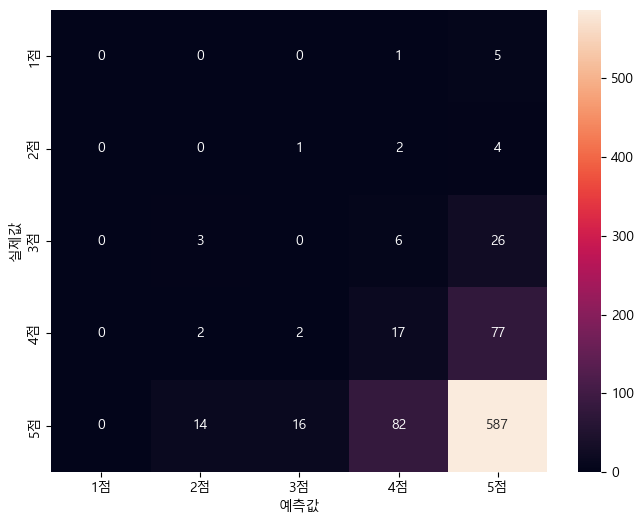

In [60]:
knn_cf_matrix = pd.DataFrame(knn_cf, index=['1점', '2점', '3점', '4점', '5점'], columns=['1점', '2점', '3점', '4점', '5점'])

# 히트맵 코드 작성
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cf_matrix, annot=True, fmt='d')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

# XGboost

In [61]:
#데이터 다시 확인해보기
df4.head()

,정가,할인가,별점,자극도,상품명_anua,상품명_dewytree,상품명_fation,상품명_goodal_cream,상품명_goodal_serum,상품명_larocheposay,...,피부고민2_미백,피부고민2_민감성,피부고민2_블랙헤드,피부고민2_아토피,피부고민2_잡티,피부고민2_주름,피부고민2_탄력,피부고민2_트러블,피부고민2_피지과다,피부고민2_홍조
0,43000,28900,3,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,43000,28900,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,43000,28900,5,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,43000,28900,5,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,43000,28900,5,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### 피처값과 타겟값  (target : 별점, 피처는 별점 제외 모든 컬럼)

In [62]:
features = df4.drop('별점', axis=1)
target = df4['별점']

#### 저장한 피처와 타겟을 가지고 train : test 데이터를 8:2로 나누어 줍니다. random_state = 50

In [63]:
from sklearn.model_selection import train_test_split

#train/test 데이터 분리 8:2로
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=50)

#### 불균형 데이터 smote로 오버샘플링

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

#### 피처의 단위를 동일하게 만들기 위해 StandardScaler로 스케일링을 진행합니다.

In [65]:
from sklearn.preprocessing import StandardScaler
      
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

#### 클래스 레이블 인코딩

In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_over)
y_test_encoded = label_encoder.fit_transform(y_test)

### 그리드서치로 최적의 파라미터 찾기 
1. 지정할 파라미터와 값을 xgboost_params에 저장합니다.  
2. xgboost 모델을 생성하고 xgboost로 할당합니다.
3. 그리드서치를 실행하여 grid_cv로 할당합니다.
4. 스케일링 완료한 훈련 데이터를 grid_cv에 fit해줍니다.
5. 최적의 파라미터를 print 합니다.

In [67]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 각 파라미터 값 넣기
xgboost_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgboost = xgb.XGBClassifier(n_jobs=-1)

grid_cv = GridSearchCV(estimator=xgboost, param_grid=xgboost_params, cv=3, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train_encoded)

print(f'최적 하이퍼 파라미터: {grid_cv.best_params_}')

최적 하이퍼 파라미터: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


### XGboost 모델 훈련

In [68]:
# 최적 파라미터 설정
best_xgboost_params = grid_cv.best_params_

xgboost = xgb.XGBClassifier(
    n_estimators=best_xgboost_params['n_estimators'], 
    max_depth=best_xgboost_params['max_depth'], 
    learning_rate=best_xgboost_params['learning_rate'],
    n_jobs=-1
)

xgboost.fit(X_train_scaled, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

#### 모델 정확도 확인

In [69]:
xgboost_pred = xgboost.predict(X_test_scaled)

_metrics(y_test_encoded,xgboost_pred)

,Accuracy,Precision,Recall,F1 Score
0,0.80355,0.80355,0.80355,0.80355


### 혼동행렬

In [70]:
from sklearn.metrics import confusion_matrix

xgboost_cf = confusion_matrix(y_test_encoded, xgboost_pred)
xgboost_cf

array([[  0,   0,   0,   0,   6],
       [  0,   2,   2,   1,   2],
       [  2,   0,   7,   4,  22],
       [  0,   0,   5,  22,  71],
       [  0,   5,  13,  33, 648]], dtype=int64)

### 혼동행렬 시각화

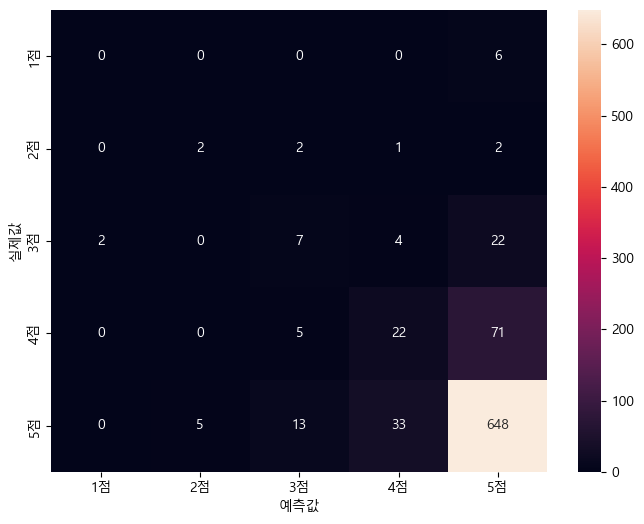

In [71]:
xgboost_cf_matrix = pd.DataFrame(xgboost_cf, index=['1점', '2점', '3점', '4점', '5점'], columns=['1점', '2점', '3점', '4점', '5점'])

# 히트맵 코드 작성
plt.figure(figsize=(8, 6))
sns.heatmap(xgboost_cf_matrix, annot=True, fmt='d')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()